<a href="https://colab.research.google.com/github/mrinalxagarwal/Biometrics-Project-Fall2021/blob/master/Code_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
train="/content/gdrive/MyDrive/Signature Databases/train"
test="/content/gdrive/MyDrive/Signature Databases/test"

In [3]:
import pandas as pd
import numpy as np
import skimage.io as sk
import cv2
import matplotlib.pyplot as plt
import os
from skimage import io
from skimage.color import rgb2gray
from skimage.transform import resize
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda, MaxPooling2D, Conv2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split

In [4]:
datagen = ImageDataGenerator(
rotation_range=15,
rescale=1./255,
shear_range=0.1,
zoom_range=0.2,
horizontal_flip=True,
width_shift_range=0.1,
height_shift_range=0.1,)
train_generator = datagen.flow_from_directory(
    directory="/content/gdrive/MyDrive/Signature Databases/train",
    target_size=(512, 512),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 1898 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(directory="/content/gdrive/MyDrive/Signature Databases/test",
    target_size=(512, 512),
    color_mode="grayscale",
    batch_size=15,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 1564 images belonging to 2 classes.


In [6]:
model = Sequential()

## Conv layer 1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(512,512, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 3
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 4
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 5
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 6
model.add(Conv2D(512, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 510, 510, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 255, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 255, 255, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 253, 253, 64)     2

In [8]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=2, verbose=1, factor=0.5, min_lr=0.00001)
callbacks = [early_stop, learning_rate_reduction]

In [11]:
history = model.fit_generator(train_generator,
                             epochs=10,
                             validation_data=test_generator,
                             validation_steps=len(test_generator),
                             steps_per_epoch=len(train_generator),
                             callbacks=callbacks)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
60/60 [==============================] - 1876s 31s/step - loss: 0.7520 - accuracy: 0.6781 - val_loss: 1.3382 - val_accuracy: 0.3990 - lr: 0.0010
Epoch 2/10
60/60 [==============================] - 1786s 30s/step - loss: 0.3500 - accuracy: 0.8651 - val_loss: 1.0419 - val_accuracy: 0.6010 - lr: 0.0010
Epoch 3/10
60/60 [==============================] - 1782s 30s/step - loss: 0.2028 - accuracy: 0.9494 - val_loss: 2.7163 - val_accuracy: 0.6010 - lr: 0.0010
Epoch 4/10
60/60 [==============================] - 1788s 30s/step - loss: 0.1902 - accuracy: 0.9531 - val_loss: 3.2772 - val_accuracy: 0.6010 - lr: 0.0010
Epoch 5/10
60/60 [==============================] - 1797s 30s/step - loss: 0.1701 - accuracy: 0.9626 - val_loss: 11.0094 - val_accuracy: 0.6010 - lr: 0.0010
Epoch 6/10
60/60 [==============================] - 1802s 30s/step - loss: 0.1646 - accuracy: 0.9621 - val_loss: 54.6917 - val_accuracy: 0.6010 - lr: 0.0010
Epoch 7/10
60/60 [==============================] - 1804s 30s/

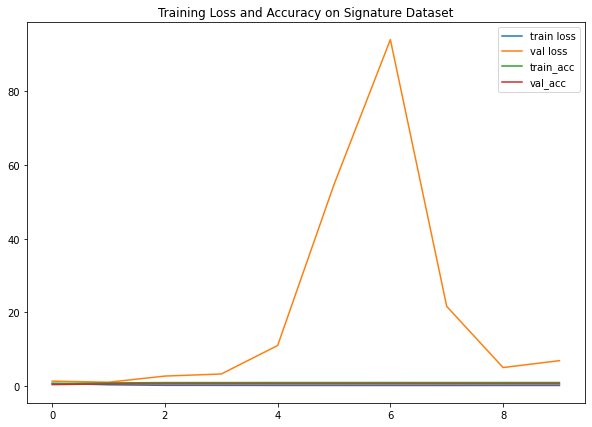

<Figure size 432x288 with 0 Axes>

In [12]:
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title("Training Loss and Accuracy on Signature Dataset")
plt.legend()
plt.show()
plt.savefig('lossval_loss')

In [13]:
from tensorflow.keras.models import load_model

model.save('forge_real_signature_model.h5')

In [14]:
pred = model.predict(test_generator)
pred

array([[9.7266936e-01, 2.7330685e-02],
       [1.0000000e+00, 4.9325957e-11],
       [1.0000000e+00, 1.2784511e-19],
       ...,
       [1.0000000e+00, 2.0099073e-17],
       [1.0000000e+00, 5.0641395e-16],
       [9.8135626e-01, 1.8643674e-02]], dtype=float32)

In [15]:
pred = np.argmax(pred, axis=1)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
model = load_model('forge_real_signature_model.h5')

In [20]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/gdrive/MyDrive/Signature Databases/test/Original/NFI-10004035.png', target_size=(512,512))

In [21]:
x = image.img_to_array(img)

In [22]:
x = x/255

from tensorflow.keras.applications.resnet50 import preprocess_input
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data=rgb2gray(img_data)
img_data.shape

(1, 512, 512)

In [23]:
a=np.argmax(model.predict(img_data), axis=1)
if(a==1):
    print("The signature is not fraud")
else:
    print("The signature is fraud")

The signature is not fraud


In [24]:
(history.history['val_loss'])

[1.3381880521774292,
 1.0418894290924072,
 2.7163138389587402,
 3.277153253555298,
 11.00943374633789,
 54.69169616699219,
 94.03334045410156,
 21.622459411621094,
 5.025481700897217,
 6.8987298011779785]